--------------------------------------------------------------

<h1 style="text-align: center;">Man vs LLMs: A comparison of Human and LLM Wikispeedia Strategy</h1>

<img src="HUMANvsAI.webp"  style="width:20%; display: block; margin: 0 auto;">

--------------------------------------------------------------

#### Table of Contents:

- ##### [0. Quick Setup](#0.-Quick-Setup)
    - ##### [0.1 Install and import the necessary Python libraries](#0.1-Install-and-import-the-necessary-Python-libraries)
    - ##### [0.2 Access the data](#0.2.-Access-the-data)

- ##### [1. Wikispeedia Page-Pair Selection](#1.-Wikispeedia-Page-Pair-Selection)
- ##### [2. LLM and Prompt Selection](#2.-LLM-and-Prompt-Selection)
- ##### [3. Methods](#3.-Methods)
    - ##### [3.1 Are LLM paths sensical to humans? ](#3.1-Are-LLM-paths-sensical-to-humans?)
    - ##### [3.2 Are LLM paths faster or slower than humans'?](#3.2-Are-LLM-paths-faster-or-slower-than-humans'?)
    - ##### [3.3 Do LLMs employ the same 'zoom-out' to hub, 'zoom-in' to spoke strategy as humans?](#3.3-Do-LLMs-employ-the-same-'zoom-out'-to-hub,-'zoom-in'-to-spoke-strategy-as-humans?)



## 0. Quick Setup
Since the code deals with a share of LLMs from Hugging Face, we recommend running the code on Google Colab if you don't have a GPU on your local machine.

Note that in sections [0.1 Install and import the necessary Python libraries](#0.1-Install-and-import-the-necessary-Python-libraries) and [0.2 Access the data](#0.2.-Access-the-data) you will have to run different code based on whether you are running the tutorial on Colab or on Jupyter Notebook. An `if statement` will take care of this. You only need to select `'colab'` or `'jupyter_notebook'` for the `platform` variable below.

In [1]:
platform = 'jupyter_notebook' #@param ['colab', 'jupyter_notebook'] {allow-input: true}

### 0.1 Install and import the necessary Python libraries

In [2]:
if platform == 'colab':
    !pip install transformers accelerate einops

else:
    !pip install . # this will install all the requirements specified in the setup.py file. Note that: you might want to crate a new venv before running this command.

Processing /Users/ernestobocini/Desktop/ada-2023-project-klech
  Preparing metadata (setup.py) ... done
ERROR: No .egg-info directory found in /private/var/folders/qx/mbfp35d17jz5g1qfw4xsv3yc0000gn/T/pip-pip-egg-info-r7p2nbl2


### 0.2 Access the data

In [3]:
# \TODO: add a link to download the data from a drive folder with authorization 
if platform == 'colab':
    from google.colab import drive
    drive.mount('/content/drive/', force_remount=True)
    data_dir = '/content/drive/MyDrive/wikispeedia_data/wikispeedia_paths-and-graph/' #@param {type:"string"}
else: 
    data_dir = './dependencies/wikispeedia_paths-and-graph/'

## 1. Wikispeedia Page-Pair Selection

In [ ]:
# isolate the most frequently played page pairs
# select a subset that represent a good distribution
## by this i mean we should ensure variety in categories, variety in how similar origin and goal are, variety in whether games were completed or not completed, etc

# proposed df:

# | pair | % games completed | avg length of game | sd of length of game | category | ... |

## 2. LLM and Prompt Selection

In [ ]:
# show results for different LLMs
# show results for different prompts
# explain selection of LLM and prompt

**We will try the following LMs:**

1. RoBERTa : \TODO add brief description
2. T5 : \TODO add brief description
3. GPT2 : \TODO add brief description
4. Falcon 7b : \TODO add brief description

**Test setup:**
In order to test the validity of the chosen LM we will ask it to navigate from *World_War_II* → *World_War_I* . This test is easily solvable by humans in two steps. It will allow us to discriminate between models that are able to: a) answer by giving a word inside the list representing the whole links of the starting page; b) choose the target word as soon as it appears.

We recognise that the models as loaded and tested directly from HuggingFace without any further fine-tuning on our task might have an hard time doing so, especially given their (relatively) small sizes.

### 2.0 - Defining the initial set up for our test

In [1]:
# import useful libraries 
import urllib.parse
import pandas as pd

from transformers import AutoTokenizer, AutoModelForCausalLM
import transformers
import torch

# extrapolating the link lists for a given wikipedia page:

# Dict of lists containing links
links = {}
df = pd.read_csv(data_dir + 'links.tsv', sep='\t', skiprows=12, header=None)
# Iterate over the dataframe rows
for index, row in df.iterrows():
    start_page = urllib.parse.unquote(row[0])
    link_page = urllib.parse.unquote(row[1])
    if start_page in links:
        links[start_page].append(link_page)
    else:
        links[start_page] = [link_page]

# Function for pulling links
def get_links_from_wikipedia_page(page_title):
    return links.get(page_title, [])

# Example of use (print only the first 5 links)
lks = get_links_from_wikipedia_page('Switzerland')
lks[:5]

: 

In [5]:
# define the question-answer setup:
question = "What is semantically closest to 'Vikings'?"

ls = get_links_from_wikipedia_page('Asteroid')
initial_context = f"Choose one option in the following set : {', '.join(ls)}"

# define the text-generation setup:
# initial_prompt = f"What is the one concept that is semantically closest to 'World_War_I' from the following set : {', '.join(ls)} ? The closest concept is: "
# initial_prompt = f"Choose the concept that is closest to 'World_War_I' inside the following set: {', '.join(ls)} ? Generate only the concept: "
initial_prompt = f"The one concept that is semantically closest to 'Vikings' from the set : [{', '.join(ls)}] is: "

##### 2.1 - RoBERTa

In [6]:
from transformers import pipeline

# Load the question-answering pipeline
qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")

# Get the answer
result = qa_pipeline(question=question, context=initial_context)
print(f"Answer: '{result['answer']}'")

print('Is the target goal in the provided list?', 'World_War_I' in ls)
print('Is the model answer in the provided list?', 'World_War_I' in ls)

: 

##### 2.2 - T5

##### 2.3 - GPT2

##### 2.4 - Falcon 7b Instruct

In [ ]:
model = "tiiuae/falcon-7b-instruct" #tiiuae/falcon-40b-instruct
tokenizer = AutoTokenizer.from_pretrained(model, device_map=0)

pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map='auto',
)

In [ ]:
sequences = pipeline(
    initial_prompt,
    max_length=1e4,
    do_sample=True,
    top_k=50,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
)

for seq in sequences:
    print(f"Result: {seq['generated_text']}")


list_of_answers = [] # list of string

for seq in sequences:
    list_of_answers.append(seq['generated_text'].split("\n")[-1])

most_freq = max(set(list_of_answers), key = list_of_answers.count) # most frequent answer
print('Answer: ', most_freq)

print('Is the target goal in the provided list?', 'Vikings' in ls)
print('Is the model answer in the provided list?', 'Film' in ls)

##### 2.5 - MPT-7B

## 3. Methods

We use this section to demonstrate some of the analysis we will perform once we have LLM-derived Wikispeedia data. 

At present, human-derived Wikispeedia data is used as a 'stand-in' for LLM-derived data where necessary. 

In [4]:
# tmp - should be handled above.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

llm_wikispeedia_pairs = pd.read_csv('dependencies/llm_wikispeedia_pairs.csv')
paths_finished = pd.read_csv('dependencies/wikispeedia_paths-and-graph/paths_finished.tsv', sep='\t', skiprows = 16, header = None, names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'])
paths_unfinished = pd.read_csv('dependencies/wikispeedia_paths-and-graph/paths_unfinished.tsv', sep='\t', skiprows=17, header = None, names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'])
pfin_etc = pd.concat([paths_finished['path'].str.split(";").apply(lambda path: path[0]), paths_finished['path'].str.split(";").apply(lambda path: path[-1]), paths_finished['path'].str.split(";").apply(lambda path: len(path)), paths_finished['path'].str.split(";").apply(lambda path: path)], axis=1)
pfin_etc.columns = ['origin', 'goal', 'path_l', 'path']
most_popular = pfin_etc.groupby(by=['origin', 'goal']).agg('count').rename(columns={"path_l": "total_pair_rounds"}).sort_values(by='total_pair_rounds', ascending=False).reset_index()[0:10][['origin', 'goal', 'total_pair_rounds']]
most_popular.to_csv('dependencies/top10pairs.csv')

#### 3.1 Are LLM paths sensical to humans?

In [5]:
# pull in BART encodings
# encode concepts in LLM paths
# across all LLM games of length N, find the embedding distance to goal and embedding distances to next page at each round
# plot these curves
# calculate proportion that strictly decrease throughout game
# supplement with Word2Vec embeddings, TF-IDF Wikipage embeddings

In [9]:
# BART

In [ ]:
from transformers import BartTokenizer, BartModel
from scipy.spatial.distance import cosine
import torch

# Load pre-trained model and tokenizer
model = 'facebook/bart-large'
tokenizer = BartTokenizer.from_pretrained(model)
bartm = BartModel.from_pretrained(model)

# List of words to embed
word_list = ['apple', 'orange', 'banana', 'grape', 'pineapple']

# Encode words and retrieve embeddings
word_embeddings = {}
for word in word_list:
    input_ids = tokenizer.encode(word, return_tensors='pt')
    with torch.no_grad():
        output = model(input_ids=input_ids)
    last_hidden_states = output.last_hidden_state.squeeze().mean(dim=0).numpy()
    word_embeddings[word] = last_hidden_states

# Calculate distances between embeddings
distance = cosine(word_embeddings[word1], word_embeddings[word2])


In [ ]:
# TF-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample corpus (replace this with your text data)
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus to TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the feature names (words) in the corpus
feature_names = vectorizer.get_feature_names_out()

# Print the TF-IDF matrix and feature names
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())
print("\nFeature Names:")
print(feature_names)


#### 3.2 Are LLM paths faster or slower than humans'?

In [ ]:
# across all LLM games of pair origin-goal, find the avg rounds needed to complete game
# do the same for human games of pair origin-goal
# match origin-goal pairs across LLM and humans
# perform a t-test on the difference in match averages 

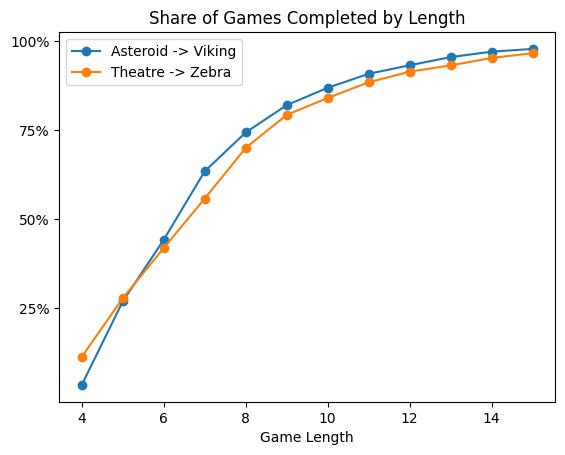

In [173]:
# distribution of game lengths for a couple popular origin-goal pairs
lengths = pd.merge(most_popular, pfin_etc, how='left', on=['origin', 'goal'])
lengths = lengths.groupby(['origin', 'goal', 'path_l']).agg('count') / lengths.groupby(['origin', 'goal']).agg('count')
lengths = lengths['total_pair_rounds'].reset_index().query("(origin == 'Asteroid' and goal == 'Viking') or (origin == 'Theatre' and goal == 'Zebra')")
lengths['cum_completed'] = lengths.groupby(['origin', 'goal'])['total_pair_rounds'].agg('cumsum')
lengths = lengths.query('path_l <= 15')

# graph
groups = lengths.groupby(['origin', 'goal'])
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['path_l'], group['cum_completed'], marker='o', label=(name[0] + " -> " + name[1]))

ax.set_xlabel('Game Length')
ax.set_ylabel('')
ax.set_title('Share of Games Completed by Length')
#ax.set_yscale('log')
ax.set_yticks([.25, .5, .75, 1])
ax.set_yticklabels(['25%', '50%', '75%', '100%'])
ax.legend()
plt.show()

Though the graph above displays cumulative completions rates by game length for two *human*-derived page pairs, once we have LLM-derived data, we can match page pairs between our LLM and humans to observe differences in game length distributions - both at the pair level and in the aggregate.

#### 3.3 Do LLMs employ the same 'zoom-out' to hub, 'zoom-in' to spoke strategy as humans?

In [ ]:
# across all LLM games of length N, calculate average degree (length of prompt list) at each round
# fit curve to quadratic model, perform goodness of fit tests
# stronger version: test for equality of curves between humans and LLM for the same page pair

In [5]:
import urllib.parse
import statsmodels.api as sm
import pandas as pd

links = {}
df = pd.read_csv('dependencies/wikispeedia_paths-and-graph/links.tsv', sep='\t', skiprows=12, header=None)
for index, row in df.iterrows(): 
    start_page = urllib.parse.unquote(row[0])
    link_page = urllib.parse.unquote(row[1])
    if start_page in links:
        links[start_page].append(link_page)
    else:
        links[start_page] = [link_page]
def get_links_from_wikipedia_page(page_title):
    return links.get(page_title, [])

paths = pd.merge(most_popular, pfin_etc, how='left', on=['origin', 'goal'])
paths['degree_path'] = paths['path'].apply(lambda path: [len(get_links_from_wikipedia_page(page)) for page in path])

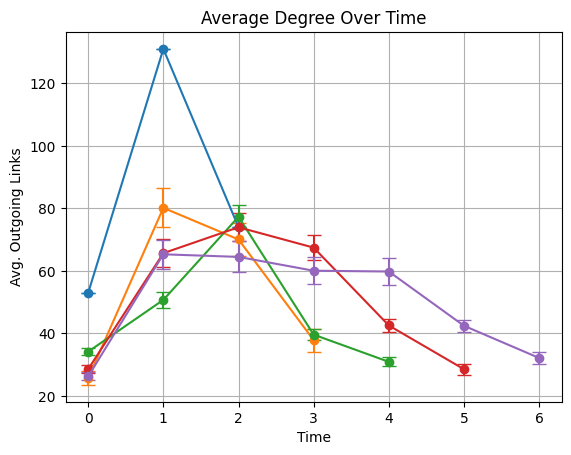

In [10]:
mea_at_stage = {}
moe_at_stage = {}

for game_length in [3, 4, 5, 6, 7]:
    mea_at_stage[game_length] = {}
    moe_at_stage[game_length] = {}
    for i, row in paths.iterrows():
        if len(row['degree_path']) == game_length:
            for j in range(len(row['degree_path'])):
                if j not in mea_at_stage[game_length].keys():
                    mea_at_stage[game_length][j] = []
                mea_at_stage[game_length][j].append(row['degree_path'][j])
    for key in mea_at_stage[game_length].keys():
        moe_at_stage[game_length][key] = 1.96 * (np.std(mea_at_stage[game_length][key], ddof=1) / np.sqrt(len(mea_at_stage[game_length][key])))
        mea_at_stage[game_length][key] = (np.mean(mea_at_stage[game_length][key]))
    
for game_length in [3, 4, 5, 6, 7]:
    mean_list = list(mea_at_stage[game_length].values())
    mofe_list = list(moe_at_stage[game_length].values())
    plt.errorbar(range(len(mean_list)), mean_list, yerr=mofe_list, fmt='-o', capsize=5)
 
plt.xlabel('Time')
plt.ylabel('Avg. Outgoing Links')
plt.title('Average Degree Over Time')
plt.grid(True)
plt.show()

The graph above displays average page degree at each stage of 3-, 4-, 5-, 6-, and 7-round games. Each curve has just one local (and therefore global) maximum that occurs *after* the initial page. This corresponds to a 'zoom-out', 'zoom-in' strategy. Once we have LLM-derived data, we can calculate the same degree averages for LLM paths and use the function below to check if the resultant curves have just one global maximum.

In [23]:
def count_local_maxima(means):
    loc_max = 0
    for i in range(1, len(means) - 1):
        if means[i] > means[i - 1] and means[i] > means[i + 1]:
            loc_max += 1
    if loc_max == 1:
        pass
    else:
        print("Multiple local maxima!")

for game_degree in [3, 4, 5, 6, 7]:
    count_local_maxima(list(mea_at_stage[game_degree].values()))

#### 3.4 Does LLM 'backtrack' behavior differ from humans?

In [187]:
# If LLM cycles, remove intermediary pages and treat cycle as a 'backtrack'
# tbd


[19, 58, 60, 22, 23, 23, 43, 62]